## Define Tetris Game

In [1]:
### version 1

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]

In [2]:
### version 2

import numpy as np

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)

In [3]:
### version 3

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED
                
        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

        self.tile_x = self.cols // 2
        self.tile_y = self.rows
        self.tile_orientation = 0
    
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            
            self.next_tile()

In [4]:
### version 4

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.max_tiles = max_tiles
        self.random_seed = random_seed
        
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED

        self.gameover = False
        self.tile_count = 0

        # Create predefined tile sequence.
        rand_state = random.getstate()
        random.seed(self.random_seed)
        self.tile_sequence = [random.randint(0, len(Tetris.TILES) - 1) 
                              for x in range(self.max_tiles)]
        random.setstate(rand_state)

        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        if self.tile_count < self.max_tiles:
            if self.random_seed is not None:
                self.current_tile = self.tile_sequence[self.tile_count]
            else:
                self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

            self.tile_x = self.cols // 2
            self.tile_y = self.rows
            self.tile_orientation = 0
            
            self.tile_count += 1
        else:
            self.gameover = True
                
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

        if self.tile_y + np.max(tile) > self.rows:
            self.gameover = True
        else:            
            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            
            self.next_tile()

In [5]:
### version 5 - FINAL > for_tetris.py

import numpy as np
import random

class Tetris:
    """Simplified Tetris."""
    
    TILES = [
        [
            [[0, 2]],  # Tile 0, orientation 0.
            [[0, 1], [0, 1]],  # Tile 0, orientation 1.
        ],
        [
            [[0, 1], [1, 2]],  # Tile 1, orientation 0.
            [[1, 2], [0, 1]],  # Tile 1, orientation 0.
        ],
        [
            [[0, 2], [1, 2]],  # Tile 2, orientation 0.
            [[0, 2], [0, 1]],  # Tile 2, orientation 1.
            [[0, 1], [0, 2]],  # Tile 2, orientation 2.
            [[1, 2], [0, 2]],  # Tile 2, orientation 3.
        ],
        [
            [[0, 2], [0, 2]],  # Tile 3, orientation 0.
        ],
    ]
    
    UNDEFINED = -1

    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris."""
        
        self.rows, self.cols = rows, cols
        self.max_tiles = max_tiles
        self.random_seed = random_seed
        
        self.restart()
        
    def restart(self):
        """Restart the game."""
        
        self.board = np.full((self.rows, self.cols), Tetris.UNDEFINED)
    
        self.current_tile = Tetris.UNDEFINED
        self.tile_x = Tetris.UNDEFINED
        self.tile_y = Tetris.UNDEFINED
        self.tile_orientation = Tetris.UNDEFINED

        self.gameover = False
        self.tile_count = 0
        self.reward = 0

        # Create predefined tile sequence.
        rand_state = random.getstate()
        random.seed(self.random_seed)
        self.tile_sequence = [random.randint(0, len(Tetris.TILES) - 1) 
                              for x in range(self.max_tiles)]
        random.setstate(rand_state)
        
        self.next_tile()
        
    def next_tile(self):
        """Get the next tile."""
        
        if self.tile_count < self.max_tiles:
            if self.random_seed is not None:
                self.current_tile = self.tile_sequence[self.tile_count]
            else:
                self.current_tile = random.randint(0, len(Tetris.TILES) - 1)

            self.tile_x = self.cols // 2
            self.tile_y = self.rows
            self.tile_orientation = 0
            
            self.tile_count += 1
        else:
            self.gameover = True
                
    def move_left(self):
        """Move current tile to the left."""
        
        if self.tile_x - 1 >= 0:
            self.tile_x -= 1
            return True
        else:
            return False
    
    def move_right(self):
        """Move current tile to the right."""

        tile_width = len(Tetris.TILES[self.current_tile][self.tile_orientation])
        if self.tile_x + 1 <= self.cols - tile_width:
            self.tile_x += 1
            return True
        else:
            return False
    
    def rotate(self):
        """Rotate current tile."""

        new_orientation = ((self.tile_orientation + 1) 
                           % len(Tetris.TILES[self.current_tile]))
        tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
        if self.tile_x <= self.cols - tile_width:
            self.tile_orientation = new_orientation
            return True
        else:
            return False
        
    def drop(self):
        """Drop current tile and update game board."""

        tile = Tetris.TILES[self.current_tile][self.tile_orientation]
        
        # Find first location where the piece collides with occupied locations.
        self.tile_y = 0
        for x in range(len(tile)):
            cury = -1
            for y in range(self.rows -1, -1, -1):
                if self.board[y, self.tile_x + x] > 0:
                    # Calculate the y position for this column 
                    # if no other columns are taken into account.
                    cury = y + 1 - tile[x][0]
                    break
            if self.tile_y < cury:
                self.tile_y = cury

        if self.tile_y + np.max(tile) > self.rows:
            self.gameover = True
            dreward = -100
        else:            
            # Change board entries at the newly placed tile to occupied.
            for x in range(len(tile)):
                self.board[self.tile_y + tile[x][0]:self.tile_y + tile[x][1], 
                           x + self.tile_x] = 1

            # Remove full lines.
            removed_lines = 0
            for y in range(self.rows - 1, -1, -1):
                if np.sum(self.board[y, :]) == self.cols:
                    removed_lines += 1
                    for y1 in range(y, self.rows - 1):
                        self.board[y1, :] = self.board[y1 + 1, :]
                    self.board[self.rows - 1, :] = Tetris.UNDEFINED
            dreward = 10 ** (removed_lines - 1) if removed_lines > 0 else 0
            
            self.next_tile()
        
        self.reward += dreward
        
        return dreward

In [6]:
#from for_tetris import Tetris

tetris = Tetris(rows=4, cols=4, max_tiles=50, random_seed=123456)

### Playing Tetris with the Command Line

In [7]:
while not tetris.gameover:
    print(f"Tile {tetris.tile_count}/{tetris.max_tiles}")
    print(f"Reward: {tetris.reward}")
    print(f"Current tile {tetris.current_tile} with "
          f"orientation {tetris.tile_orientation} at position {tetris.tile_x}")
    print(tetris.TILES[tetris.current_tile][tetris.tile_orientation])
    print(tetris.board)
    
    cmd = input("Please enter your command (L, R, O, D, X): ").upper()
    print(f"Your input: {cmd}")

    if cmd == "L":
        tetris.move_left()
    elif cmd == "R":
        tetris.move_right()
    elif cmd == "O":
        tetris.rotate()
    elif cmd == "D":
        tetris.drop()
    elif cmd == "X":
        break


Tile 1/50
Reward: 0
Current tile 2 with orientation 0 at position 2
[[0, 2], [1, 2]]
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]
Your input: L
Tile 1/50
Reward: 0
Current tile 2 with orientation 0 at position 1
[[0, 2], [1, 2]]
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]
Your input: D
Tile 2/50
Reward: 0
Current tile 0 with orientation 0 at position 2
[[0, 2]]
[[-1  1 -1 -1]
 [-1  1  1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]
Your input: X


### Playing Tetris with GUI

In [8]:
### FINAL > for_tetris.py

import pygame

def play_tetris_with_gui(tetris):
    """Play Tetris with GUI for human players."""

    # GUI parameters.
    TILE_SIZE = 20

    BLACK = (0, 0, 0)
    GREY = (128, 128, 128)
    WHITE = (255, 255, 255)
    RED =  (255, 0, 0)

    # Initialize the game engine.
    pygame.init()
    pygame.display.set_caption("TETRIS")
    screen = pygame.display.set_mode((200 + tetris.cols * TILE_SIZE, 
                                    200 + tetris.rows * TILE_SIZE))
    pygame.key.set_repeat(300, 100)  # Set keyboard delay and interval in ms.
    font = pygame.font.SysFont("Calibri", 25, True)

    # Loop until the window is closed.
    running = True
    while running:    
        # Paint game board.
        if pygame.display.get_active():
            screen.fill(WHITE)

            for i in range(tetris.rows):
                for j in range(tetris.cols):
                    pygame.draw.rect(
                        screen, 
                        GREY, 
                        [100 + TILE_SIZE * j, 
                         80 + TILE_SIZE * (tetris.rows - i), 
                         TILE_SIZE, 
                         TILE_SIZE], 
                        1
                    )
                    if tetris.board[i][j] > 0:
                        pygame.draw.rect(
                            screen, 
                            BLACK,
                            [101 + TILE_SIZE * j, 
                             81 + TILE_SIZE * (tetris.rows - i), 
                             TILE_SIZE - 2, 
                             TILE_SIZE - 2],
                        )
            
            tile = tetris.TILES[tetris.current_tile][tetris.tile_orientation]
            for x in range(len(tile)):
                for y in range(tile[x][0], tile[x][1]):
                    pygame.draw.rect(
                        screen,
                        RED,
                        [101 + TILE_SIZE * (x + tetris.tile_x), 
                         81 + TILE_SIZE * (tetris.rows - (y + tetris.tile_y)), 
                         TILE_SIZE - 2,
                         TILE_SIZE - 2]
                    )
            
            screen.blit(
                font.render(f"Reward: {tetris.reward}", True, BLACK), 
                [0, 0]
            )
            screen.blit(
                font.render(f"Tile {tetris.tile_count}/{tetris.max_tiles}", 
                            True, BLACK), 
                [0, 30]
            )
            if tetris.gameover:
                screen.blit(font.render("G A M E   O V E R", True, RED), 
                            [40, 100 + tetris.rows * TILE_SIZE])
                screen.blit(font.render("Press ESC to try again", True, RED), 
                            [10, 100 + tetris.rows * TILE_SIZE + 30])

        pygame.display.flip()
        
        # Get user input.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    tetris.restart()
                if not tetris.gameover:
                    if event.key == pygame.K_LEFT:
                        tetris.move_left()
                    elif event.key == pygame.K_RIGHT:
                        tetris.move_right()
                    elif event.key == pygame.K_UP:
                        tetris.rotate()
                    elif event.key == pygame.K_DOWN:
                        tetris.drop()    
                
    pygame.quit()


pygame 2.5.2 (SDL 2.28.3, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
#from for_tetris import tetris_gui

tetris.restart()
play_tetris_with_gui(tetris)

## Q-Learning

### Adapt Tetris for Q-learning with teleportation

In [10]:
### FINAL > for_tetris.py
 
class QLTetris(Tetris):
    """Simplified Tetris for Q-learning."""
    
    def __init__(self, rows, cols, max_tiles, random_seed):
        """Initialize Tetris for Q-learning."""
        
        super().__init__(rows, cols, max_tiles, random_seed)
    
    def teleport(self, new_x, new_orientation):
        """Teleport current tile to new position and orientation."""
            
        if 0 <= new_orientation < len(Tetris.TILES[self.current_tile]):
            tile_width = len(Tetris.TILES[self.current_tile][new_orientation])
            if 0 <= new_x <= self.cols - tile_width:
                self.tile_x = new_x
                self.tile_orientation = new_orientation
                return True
        return False


In [11]:
# from for_tetris import QLTetris

qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=123456)

### QLAgent

In [12]:
### version 1
# Agent that picks a random action and tries the teleportation and drop off.
# Nothing happens if teleportation is to illegal place

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            # Select action.
            action = np.random.randint(self.action_num)
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
        return True  # Continue.



In [13]:
### FINAL > for_tetris.py

def observe_tetris_with_gui(tetris, agent):
    """Observe with GUI Tetris played by a QL agent."""

    # GUI parameters.
    TILE_SIZE = 20

    BLACK = (0, 0, 0)
    GREY = (128, 128, 128)
    WHITE = (255, 255, 255)
    RED =  (255, 0, 0)

    # Initialize the game engine.
    pygame.init()
    pygame.display.set_caption("TETRIS")
    screen = pygame.display.set_mode((200 + tetris.cols * TILE_SIZE, 
                                    200 + tetris.rows * TILE_SIZE))
    pygame.key.set_repeat(300, 100)  # Set keyboard delay and interval in ms.
    font = pygame.font.SysFont("Calibri", 25, True)

    # Loop until the window is closed.
    running = True
    while running:    
        # Paint game board.
        if pygame.display.get_active():
            screen.fill(WHITE)

            for i in range(tetris.rows):
                for j in range(tetris.cols):
                    pygame.draw.rect(
                        screen, 
                        GREY, 
                        [100 + TILE_SIZE * j, 
                         80 + TILE_SIZE * (tetris.rows - i), 
                         TILE_SIZE, 
                         TILE_SIZE], 
                        1
                    )
                    if tetris.board[i][j] > 0:
                        pygame.draw.rect(
                            screen, 
                            BLACK,
                            [101 + TILE_SIZE * j, 
                             81 + TILE_SIZE * (tetris.rows - i), 
                             TILE_SIZE - 2, 
                             TILE_SIZE - 2],
                        )
            
            tile = tetris.TILES[tetris.current_tile][tetris.tile_orientation]
            for x in range(len(tile)):
                for y in range(tile[x][0], tile[x][1]):
                    pygame.draw.rect(
                        screen,
                        RED,
                        [101 + TILE_SIZE * (x + tetris.tile_x), 
                         81 + TILE_SIZE * (tetris.rows - (y + tetris.tile_y)), 
                         TILE_SIZE - 2,
                         TILE_SIZE - 2]
                    )
            
            screen.blit(
                font.render(f"Reward: {tetris.reward}", True, BLACK), 
                [0, 0]
            )
            screen.blit(
                font.render(f"Tile {tetris.tile_count}/{tetris.max_tiles}", 
                            True, BLACK), 
                [0, 30]
            )
            if tetris.gameover:
                screen.blit(font.render("G A M E   O V E R", True, RED), 
                            [40, 100 + tetris.rows * TILE_SIZE])
                screen.blit(font.render("Press ESC to try again", True, RED), 
                            [10, 100 + tetris.rows * TILE_SIZE + 30])

        pygame.display.flip()
        
        # Get user input.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                running = agent.next_turn()
                
    pygame.quit()


In [14]:
#from for_tetris import observe_tetris_with_gui

qltetris.restart()
agent = QLAgent(qltetris, games=3)
observe_tetris_with_gui(qltetris, agent)

In [15]:
### version 2
# Adds the states

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles.
        )
        self.state_num = 2 ** self.state_size

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            action = np.random.randint(self.action_num)
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

        return True  # Continue.


In [16]:
qltetris.restart()
agent = QLAgent(qltetris, games=3)
observe_tetris_with_gui(qltetris, agent)

In [17]:
### version 3
# Choose strategy from Q-matrix - note that it teleports all tiles to position 0 and orientation 0

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games, epsilon):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        self.epsilon = epsilon  # Probability to choose a random action in the epsilon-greedy policy.
        self.Q_table = np.zeros((self.state_num, self.action_num))

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
            else:
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            if np.random.rand() < self.epsilon:
                action = np.random.randint(self.action_num)
            else:
                action = np.argmax(self.Q_table[old_state, :])
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

        return True  # Continue.


In [18]:
qltetris.restart()
agent = QLAgent(qltetris, games=3, epsilon=0)
observe_tetris_with_gui(qltetris, agent)

In [19]:
### version 4 - FINAL > for_tetris.py
# Complete version, also training the Q-matrix

class QLAgent:
    """Q-learning agent to play Tetris."""
    
    def __init__(self, tetris, games, epsilon, alpha, gamma):
        """Initialize the agent."""
        
        self.tetris = tetris
        
        self.games = games
        self.game = 0
        
        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        self.epsilon = epsilon  # Probability to choose a random action in the epsilon-greedy policy.
        self.Q_table = np.zeros((self.state_num, self.action_num))

        self.alpha = alpha  # Alpha is the learning rate.
        self.gamma = gamma  # Discount factor.
        self.rewards = np.zeros(games)

        self.update_state()

    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        tile = bin(self.tetris.current_tile)[2:]

        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = int("".join(str(i) for i in self.state_binary), 2)

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            self.rewards[self.game] = self.tetris.reward
            if self.game % 100 == 0:
                av_reward = np.mean(self.rewards[self.game - 100:self.game])
                print(f"game {self.game}/{self.games} reward {av_reward}")

            if self.game + 1 < self.games:
                self.game += 1
                self.tetris.restart()
                self.update_state()
            else:
                np.savetxt('Q_table.txt', self.Q_table)
                return False  # Finish.
        else:
            old_state = self.state

            # Select action.
            if np.random.rand() < self.epsilon:
                action = np.random.randint(self.action_num)
            else:
                action = np.argmax(self.Q_table[old_state, :])
            
            # Extract rotation and movement from action parameter.
            new_x = action // self.position_num
            new_orientation = action % self.orientation_num

            # Execute action and drop tile.
            if self.tetris.teleport(new_x, new_orientation):                    ### Note that nothing happens if the teleportation is not valid.
                reward = self.tetris.drop()
            
                # Update the state.
                self.update_state()
                new_state = self.state

                # Update the Q-table using the old state and the reward.
                dQ = self.alpha * (
                    reward
                    + self.gamma * np.max(self.Q_table[new_state, :])
                    - self.Q_table[old_state, action]
                )
                            
                # Update the Q-table.
                self.Q_table[old_state, action] += dQ
            else:  # Penalty for illegal move.
                self.Q_table[old_state, action] += -50

        return True  # Continue.


In [20]:
qltetris.restart()
agent = QLAgent(qltetris, games=1_000, epsilon=0, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/1000 reward nan
game 100/1000 reward -88.46
game 200/1000 reward -70.45
game 300/1000 reward -48.08
game 400/1000 reward 14.31
game 500/1000 reward 70.0
game 600/1000 reward 70.0
game 700/1000 reward 70.0
game 800/1000 reward 70.0
game 900/1000 reward 70.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


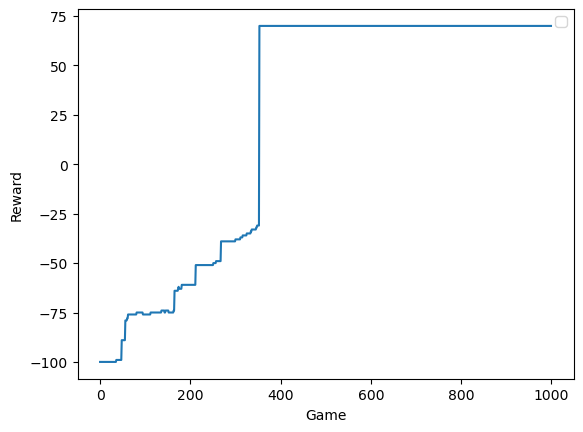

In [23]:
import matplotlib.pyplot as plt

#smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards) #, label='Raw Rewards')
#plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [24]:
qltetris.restart()
agent = QLAgent(qltetris, games=1, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/giovannivolpe/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


game 0/1 reward nan


In [25]:
# Note how only few lines are non-zero.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 84


In [31]:
Q_table.shape

(262144, 16)

### Try also with epsilon = 0.001 and games = 100_000

In [27]:
# Try also with epsilon = 0.001 and games = 100_000

qltetris.restart()
agent = QLAgent(qltetris, games=100_000, epsilon=0.001, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

game 0/100000 reward nan
game 100/100000 reward -88.46
game 200/100000 reward -70.45
game 300/100000 reward -48.08
game 400/100000 reward 10.34
game 500/100000 reward 70.0
game 600/100000 reward 68.9
game 700/100000 reward 65.86
game 800/100000 reward 70.0
game 900/100000 reward 70.0
game 1000/100000 reward 65.13
game 1100/100000 reward 68.99
game 1200/100000 reward 67.93
game 1300/100000 reward 66.17
game 1400/100000 reward 67.6
game 1500/100000 reward 68.41
game 1600/100000 reward 68.31
game 1700/100000 reward 67.11
game 1800/100000 reward 65.75
game 1900/100000 reward 65.61
game 2000/100000 reward 70.0
game 2100/100000 reward 68.81
game 2200/100000 reward 67.18
game 2300/100000 reward 68.67
game 2400/100000 reward 70.0
game 2500/100000 reward 68.96
game 2600/100000 reward 68.67
game 2700/100000 reward 66.11
game 2800/100000 reward 68.41
game 2900/100000 reward 67.48
game 3000/100000 reward 67.42
game 3100/100000 reward 64.36
game 3200/100000 reward 70.0
game 3300/100000 reward 59.34

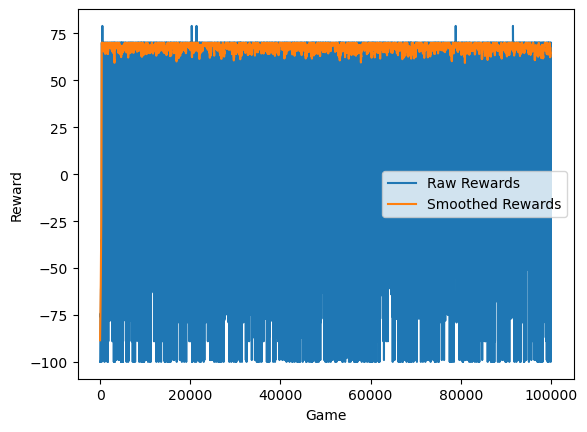

In [28]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [29]:
qltetris.restart()
agent = QLAgent(qltetris, games=3, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

game 0/3 reward nan


In [30]:
# Interesting to note that the number of non-zero rows increases in this case.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 289


## Q-Learning with a Random Tile Sequence

In [32]:
qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=None)
agent = QLAgent(qltetris, games=200_000, epsilon=0.001, alpha=0.2, gamma=1)

while agent.next_turn():
    pass

game 0/200000 reward nan
game 100/200000 reward -99.88
game 200/200000 reward -99.71
game 300/200000 reward -99.48
game 400/200000 reward -98.84
game 500/200000 reward -98.46
game 600/200000 reward -98.46
game 700/200000 reward -98.49
game 800/200000 reward -98.31
game 900/200000 reward -98.05
game 1000/200000 reward -97.92
game 1100/200000 reward -96.84
game 1200/200000 reward -97.96
game 1300/200000 reward -97.33
game 1400/200000 reward -97.4
game 1500/200000 reward -97.21
game 1600/200000 reward -97.96
game 1700/200000 reward -97.61
game 1800/200000 reward -97.33
game 1900/200000 reward -97.63
game 2000/200000 reward -97.37
game 2100/200000 reward -98.05
game 2200/200000 reward -97.41
game 2300/200000 reward -97.22
game 2400/200000 reward -96.84
game 2500/200000 reward -96.98
game 2600/200000 reward -96.46
game 2700/200000 reward -97.03
game 2800/200000 reward -96.82
game 2900/200000 reward -97.74
game 3000/200000 reward -97.52
game 3100/200000 reward -96.51
game 3200/200000 reward 

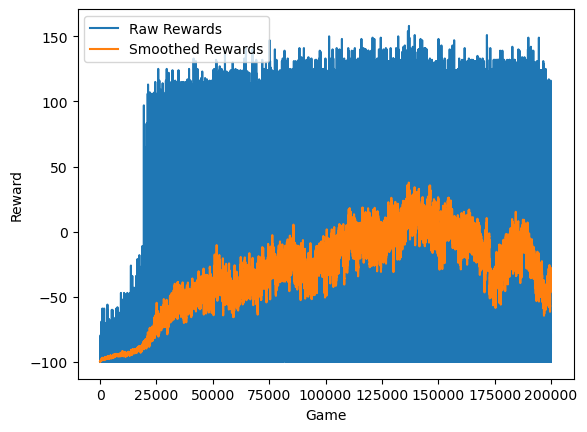

In [33]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [34]:
qltetris.restart()
agent = QLAgent(qltetris, games=100, epsilon=0, alpha=0.2, gamma=1)
agent.Q_table = np.loadtxt("Q_table.txt")
observe_tetris_with_gui(qltetris, agent)

game 0/100 reward nan


In [35]:
# Interesting to note that the number of non-zero rows increases in this case.

Q_table = agent.Q_table
non_zero_rows_mask = np.any(Q_table != 0, axis=1)
num_non_zero_rows = np.sum(non_zero_rows_mask)
print(f"Non-zero rows = {num_non_zero_rows}")

Non-zero rows = 23866


## Deep Q-Learning

In [54]:
import deeplay as dl
import torch

class DQLAgent(dl.Application):
    """Deep-Q-learning agent to play Tetris.""" ### HERE
    
    def __init__(self, tetris, games, ### FROM HERE 
                 epsilon_max, epsilon_min, epsilon_scale, alpha, gamma, 
                 hidden_units, 
                 replay_buffer_size, batch_size, sync_target_game_count,
                 **kwargs): ### TO HERE
        """Initialize the agent."""
        
        self.tetris = tetris

        self.games = games
        self.game = 0

        self.position_num = self.tetris.rows
        self.orientation_num = np.max([len(tile) for tile in Tetris.TILES])
        self.action_num = self.position_num * self.orientation_num

        self.state_size = (
            self.tetris.cols * self.tetris.rows  # Cells in board.
            + 1 + np.floor(np.log2(len(Tetris.TILES) - 1)).astype(int)  # Tiles
        )
        self.state_num = 2 ** self.state_size

        ### FROM HERE
        self.epsilon_max = epsilon_max 
        self.epsilon_min = epsilon_min  # Probability to choose a random action in the epsilon-greedy policy.
        self.epsilon_scale = epsilon_scale  # Decay scale of the game number where epsilon changes from unity to epsilon.
        self.epsilon = self.epsilon_max
        ### TO HERE

        self.alpha = alpha  # Alpha is the learning rate.
        self.gamma = gamma  # Discount factor.
        self.rewards = np.zeros(games)
        self.max_reward = 0 ### HERE

        ### FROM HERE
        self.buffer = []
        self.replay_buffer_size = replay_buffer_size  # Size of the experience replay buffer.
        self.batch_size = batch_size  # Number of samples taken from the experience replay buffer for each update.
        self.sync_target_game_count = sync_target_game_count  # Number of episodes between synchronizations of the target network.        

        self.q_net = self.get_net(hidden_units)
        self.target_net = self.get_net(hidden_units)

        super().__init__(
            loss=torch.nn.MSELoss(),
            optimizer=torch.optim.Adam(self.q_net.parameters(), lr=0.001),  ### Is it strictly needed to have self.q_net.parameters() as argument?
            **kwargs, 
        )
        ### TO HERE

        self.update_state()
    
    ### FROM HERE
    def get_net(self, hidden_units):
        """Create instance of neural network."""
        
        net = dl.MultiLayerPerceptron(
            in_features=self.state_size,
            hidden_features=hidden_units,
            out_features=self.action_num,
        )
        net.blocks[:-1].activation = torch.nn.ReLU()  # GELU stabilizes training, ReLU works ok as well.
        return net.build()
    ### TO HERE
    
    def update_state(self):
        """Update the state of the agent."""
        
        # Convert tile to binary list.
        ### FROM HERE
        tile = bin(self.tetris.current_tile)[2:].zfill(2) ### instead of 2 use proper variable for the digits for tiles
        tile = np.array([int(i) for i in tile])
        ### TO HERE
    
        # Convert board to binary list.
        board = np.copy(self.tetris.board.reshape((-1,))).astype(int)
        board[board == Tetris.UNDEFINED] = 0
        
        self.state_binary = np.append(tile, board)
        self.state = torch.tensor(self.state_binary, dtype=torch.float32) ### HERE

    def next_turn(self):
        """Executes the next turn in the game."""
        
        if self.tetris.gameover:
            self.rewards[self.game] = self.tetris.reward
            if self.game % 100 == 0:
                av_reward = np.mean(self.rewards[self.game - 100:self.game])
                print(f"game {self.game}/{self.games} reward {av_reward}")
                ### FROM HERE
                if av_reward > self.max_reward:
                    self.max_reward = av_reward
                    torch.save(self.q_net.state_dict(), 'q_net.pth')
                ### TO HERE
            
            self.epsilon = max(self.epsilon_min, ### HERE
                               self.epsilon_max - self.game / self.epsilon_scale)
            if self.game + 1 < self.games:                                      ### Edited!
                self.game += 1
                ### FROM HERE
                if ((len(self.buffer) >= self.replay_buffer_size)
                    and (self.game % self.sync_target_game_count == 0)):
                    self.target_net.load_state_dict(self.q_net.state_dict())
                ### TO HERE

                self.tetris.restart()
                self.update_state()                                             ### Added!
            else:
                ### NOTE MISSING LINE
                return False  # Finish.
        else:
            old_state = self.state
            
            # Select action.
            with torch.no_grad(): ### HERE
                if np.random.rand() < self.epsilon:
                    action = np.random.randint(self.action_num)
                else:
                    ### FROM HERE
                    state = self.state.view(1, self.state_size)
                    output = self.q_net(state).detach().numpy()[0]
                    action = np.argmax(output)
                    ### TO HERE
            
                # Extract rotation and movement from action parameter.
                new_x = action // self.position_num
                new_orientation = action % self.orientation_num
                
                # Execute action and drop tile.
                self.tetris.teleport(new_x, new_orientation) ### NOTE MISSING IF
                reward = self.tetris.drop()
                    
                # Update the state.
                self.update_state()
                new_state = self.state
                
                ### FROM HERE
                # Append to buffer and train network.
                self.buffer.append({
                    "old_state":old_state,
                    "action":action,
                    "reward":reward,
                    "new_state":new_state,
                    "gameover":self.tetris.gameover,
                })
                if len(self.buffer) >= self.replay_buffer_size + 1:
                    self.buffer.pop(0)
            if len(self.buffer) >= self.replay_buffer_size:
                # Training step.
                batch = random.sample(self.buffer, self.batch_size)

                # Store states in a list
                states = []
                next_states = []
                for sample in batch:
                    states.append(sample["old_state"])
                    next_states.append(sample["new_state"])
                # Initialize targets and target mask
                targets = torch.zeros(self.batch_size, self.action_num)
                targets_mask = torch.zeros(self.batch_size, self.action_num)
                # Evaluate next state with target network
                with torch.no_grad():
                    q_hat = self.target_net(torch.stack(next_states, dim=0))
                # Computes targets
                for idx, sample in enumerate(batch):
                    if sample["gameover"]:
                        y = sample["reward"]
                    else:
                        y = sample["reward"] + np.nanmax(q_hat[idx, :])
                    targets[idx, sample["action"]] = y
                    targets_mask[idx, sample["action"]] = 1
                # Evaluate old states, apply mask and update weights
                self.optimizer.zero_grad()
                outputs = self.q_net(torch.stack(states, dim=0)) * targets_mask
                loss = self.loss(outputs, targets)
                loss.backward()
                self.optimizer.step()
            ### TO HERE
        
        return True  # Continue.    


In [55]:
qltetris = QLTetris(rows=4, cols=4, max_tiles=50, random_seed=None)
agent = DQLAgent(qltetris, games=10_000, 
                 epsilon_max=1, epsilon_min=0.001, epsilon_scale=5000,
                 alpha=0.001, gamma=1,  
                 hidden_units=[128, 128],
                 replay_buffer_size=10000, batch_size=64, 
                 sync_target_game_count=100)

print(agent.q_net)
print(agent.target_net)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LayerActivationNormalization(
      (layer): Linear(in_features=18, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (1): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (2): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=16, bias=True)
      (activation): Identity()
      (normalization): Identity()
    )
  )
)
MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LayerActivationNormalization(
      (layer): Linear(in_features=18, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (1): LayerActivationNormalization(
      (layer): Linear(in_features=128, out_features=128, bias=True)
      (activation): ReLU()
      (normalization): Identity()
    )
    (2): LayerActivationNormaliza

In [56]:
while agent.next_turn():
    pass

game 0/10000 reward nan
game 100/10000 reward -99.45
game 200/10000 reward -99.74
game 300/10000 reward -99.88
game 400/10000 reward -99.54
game 500/10000 reward -99.83
game 600/10000 reward -99.83
game 700/10000 reward -99.67
game 800/10000 reward -99.82
game 900/10000 reward -99.38
game 1000/10000 reward -99.73
game 1100/10000 reward -99.62
game 1200/10000 reward -99.72
game 1300/10000 reward -99.7
game 1400/10000 reward -99.78
game 1500/10000 reward -99.69
game 1600/10000 reward -99.82
game 1700/10000 reward -99.74
game 1800/10000 reward -99.81
game 1900/10000 reward -99.8
game 2000/10000 reward -99.75
game 2100/10000 reward -99.68
game 2200/10000 reward -99.91
game 2300/10000 reward -99.57
game 2400/10000 reward -99.9
game 2500/10000 reward -99.69
game 2600/10000 reward -99.82
game 2700/10000 reward -99.85
game 2800/10000 reward -99.65
game 2900/10000 reward -98.37
game 3000/10000 reward -97.51
game 3100/10000 reward -98.01
game 3200/10000 reward -98.56
game 3300/10000 reward -97.1

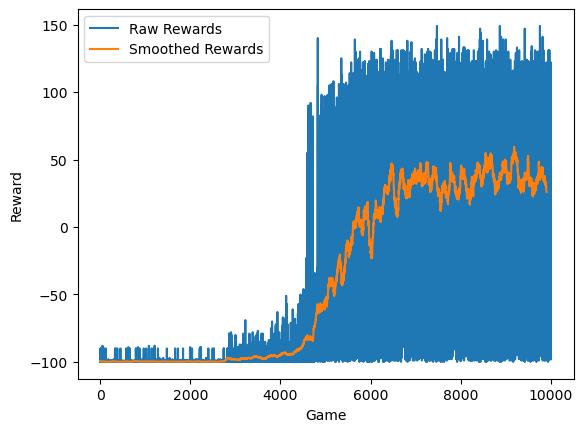

In [57]:
import matplotlib.pyplot as plt

smoothed_rewards = np.convolve(agent.rewards, np.ones(100) / 100, mode='valid')

plt.plot(agent.rewards, label='Raw Rewards')
plt.plot(smoothed_rewards, label='Smoothed Rewards')
plt.ylabel('Reward')
plt.xlabel('Game')
plt.legend()
plt.show()

In [58]:
qltetris.restart()
agent = DQLAgent(qltetris, games=10_000, 
                 epsilon_max=0, epsilon_min=0, epsilon_scale=5000, 
                 alpha=0.001, gamma=1,
                 hidden_units=[128, 128],
                 replay_buffer_size=10000, batch_size=64, 
                 sync_target_game_count=100)
model_state_dict = torch.load("q_net.pth")
agent.q_net.load_state_dict(model_state_dict)
agent.target_net.load_state_dict(model_state_dict)
observe_tetris_with_gui(qltetris, agent)